# 第3章 （4）最小二乗法のパラメータを最急降下法で最適化する
## 最急降下法の実装

機械学習では，データが発生するメカニズムをなんらかの数理モデルに当てはめる．このとき，目的関数を設定し，この目的関数を最小（あるいは最大）にするパラメータを求めることがよくある．目的関数が解析に解けるときは良いが，陽に解けない場合，その近似値をなんらかの方法で求める必要がある．このときに用いる手法が最急降下法である．  

最急降下法は，Deep Learningの学習にも使われており，機械学習では基本の技術となっている．

### 目的関数

$$
 f(x)=x^4 - 8x^3 + 18x^2 - 3x +1
$$

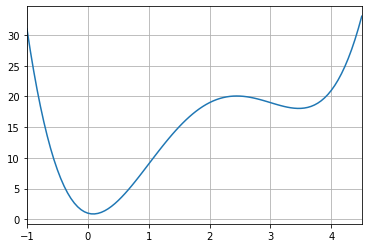

In [19]:
import numpy as np

#
# 目的関数を設定（この関数の最小値を求めたい．）
#
def mathfunc(x):
    y = x**4 - 8*x**3 + 18*x**2 - 3*x  + 1
    return y

#
# 作成した関数のグラフを表示する
#
import matplotlib.pyplot as plt

# グラフ描画のためのデータ作成
xmin = -1.0
xmax = 4.5
num = 100
x = np.linspace(xmin, xmax, num)
y = mathfunc(x)

# グラフ描画
plt.plot(x, y)
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

# この目的関数の最小値を最急降下法で求める

目的関数を微分する．これは人間が解く必要がある．  

ただし，近年は，有用なツールが多く存在する．  
例えば，[Wolfram](https://www.wolframalpha.com/)を使えば，グラフの表示だけでなく，微分もしてくれる．


$$
 f(x)=x^4 - 8x^3 + 18x^2 - 3x - 11\\
 f'(x) = 4x^3-24x^2+36x-3
$$


In [11]:
# 初期値
a = 2.0

# 学習係数
eta = 0.01

# 目的関数の微分
def ｄerivative(x):
    y = 4*x**3 - 24*x**2 + 36*x-3
    return y

for i in range(10):
    print(a)

    # 更新式
    a = a - eta*derivative(a)
    

2.0
1.95
1.894005
1.8313332338987178
1.7612851544778672
1.6831834975092712
1.596437506273249
1.5006390178994629
1.3956965540006094
1.2820073859504062


初期値2．0で初めて，徐々に最小値をとるｘに近づいている．  
これをグラフ表示する．

a= 0.08847495075216384


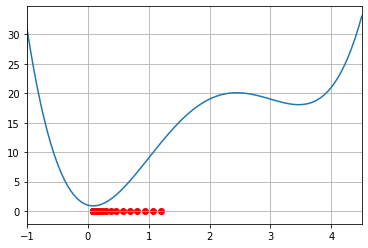

In [35]:
import numpy as np

#
# 目的関数を設定（この関数の最小値を求めたい．）
#
def mathfunc(x):
    y = x**4 - 8*x**3 + 18*x**2 - 3*x +1
    return y

# 最急降下法で目的関数の最小値をとるパラメータを求める．

# 初期値
a = 1.2

# 学習係数
eta = 0.01

# 目的関数の微分
def ｄerivative(x):
    y = 4*x**3 - 24*x**2 + 36*x-3
    return y

para_x = []
para_y =[]

for i in range(50):
    para_x.append(a)
    para_y.append(0)
    # 更新式
    a = a - eta*derivative(a)

# 求めたパラメータ
print('a=', a)

#
# 最急降下法の様子をグラフを表示する
#
import matplotlib.pyplot as plt

# グラフ描画のためのデータ作成
xmin = -1.0
xmax = 4.5
num = 100
x = np.linspace(xmin, xmax, num)
y = mathfunc(x)

# グラフ描画
plt.plot(x, y)
plt.scatter(para_x, para_y, color='red')
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

初期値を変更すると，求まる解が異なることがわかる．  
また，一般的に終了条件は，回数ではなく，前回と今回の差が一定よりも小さくなったら終了する．  
つまり，更新しても，パラメータが変更されなくなったら終了する．  

## 演習

- 初期値a = 1.2を変更してみる．
- 学習係数eta = 0.01を変更してみる．
- 終了条件epsilon = 0.0001を変更してみる．


更新回数= 26
a= 0.08866251044482384


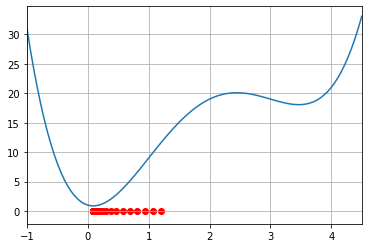

In [59]:
import numpy as np

#
# 目的関数を設定（この関数の最小値を求めたい．）
#
def mathfunc(x):
    y = x**4 - 8*x**3 + 18*x**2 - 3*x +1
    return y

# 最急降下法で目的関数の最小値をとるパラメータを求める．

# 初期値
a = 1.2

# 学習係数
eta = 0.01

# 目的関数の微分
def ｄerivative(x):
    y = 4*x**3 - 24*x**2 + 36*x-3
    return y

para_x = []
para_y =[]

# 終了条件
epsilon = 0.0001
old_para = a

ct = 0
for i in range(1000):
    para_x.append(a)
    para_y.append(0)
    # 更新式
    a = a - eta*derivative(a)
    if abs(old_para-a)<epsilon:
        break
    old_para = a
    ct+=1

# 更新回数
print('更新回数=', ct)

# 求めたパラメータ
print('a=', a)

#
# 最急降下法の様子をグラフを表示する
#
import matplotlib.pyplot as plt

# グラフ描画のためのデータ作成
xmin = -1.0
xmax = 4.5
num = 100
x = np.linspace(xmin, xmax, num)
y = mathfunc(x)

# グラフ描画
plt.plot(x, y)
plt.scatter(para_x, para_y, color='red')
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

# 目的関数が微分できれば，多変数関数でも極小値を求めることができる

目的関数

$$
 f\left(x,y\right)=\sin{(x)}+2x\cos{(y)}+0.2x^2+0.2y^2
$$

gnuplotのコマンド

```
set isosamples 50
set hidden3d
splot sin(x)+2*x*cos(y)+0.2*x**2+0.2*y**2
```

![title](./img/sincos.png)

目的関数

$$
 f\left(x,y\right)=\sin{(x)}+2x\cos{(y)}+0.2x^2+0.2y^2
$$

偏微分
$$
\begin{align}
\frac{\partial f(x,y)}{\partial x} &=\cos{(x)}+2\cos{(y)}+0.4x\\
\frac{\partial f(x,y)}{\partial y} &=-2x\sin{(y)}+0.4y
\end{align}
$$


更新回数= 502
a= 4.579723216805037
b= 2.595723201316957


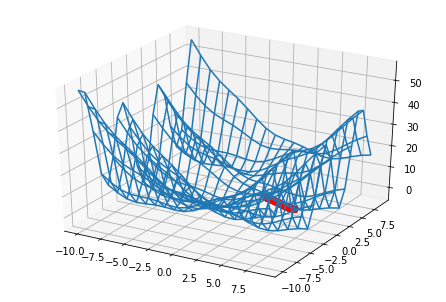

In [95]:
# 複雑な3次元データの最小値を求める．

import numpy as np

#
# 目的関数を設定（この関数の最小値を求めたい．）
#
def mathfunc(a, b):
    y = np.sin(a)+2*a*np.cos(b)+0.2*a**2+0.2*b**2
    return y

# 最急降下法で目的関数の最小値をとるパラメータを求める．

# 初期値
a = 2.0
b = 2.0
c = mathfunc(a, b)

# 学習係数
eta = 0.01

# 目的関数の偏微分:x
def ｄerivative_x(a, b):
    y = np.cos(a)+2.0*np.cos(b)+0.4*a
    return y

# 目的関数の偏微分:y
def ｄerivative_y(a,b):
    y = -2*np.sin(b)+0.4*b
    return y

para_a = []
para_b =[]
para_c =[]

# 終了条件
epsilon = 0.0001
old_para_a = a
old_para_b = b

ct = 0
for i in range(1000):
    para_a.append(a)
    para_b.append(b)
    para_c.append(c)

    # 更新式
    a = a - eta*derivative_x(a, b)
    b = b - eta*derivative_y(a, b)
    c = mathfunc(a, b)
    
    if abs(old_para_a-a)<epsilon and abs(old_para_b-b)<epsilon:
        break
    old_para_a = a
    old_para_b = b
    
    ct+=1

# 更新回数
print('更新回数=', ct)

# 求めたパラメータ
print('a=', a)
print('b=', b)

#
# 最急降下法の様子をグラフを表示する
# （ここでは3次元グラフ）
#

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10.0, 10.0, 1)
y = np.arange(-10.0, 10.0, 1)
X, Y = np.meshgrid(x, y)
Z = mathfunc(X, Y)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X, Y, Z)
ax.plot(para_a, para_b, para_c,marker="o",linestyle='None', color='red')
plt.show()

In [97]:
# わかりにくいのでデータをファイル出力して，gnuplotで表示する

import pandas as pd

x = np.array(para_a).T
df_x = pd.DataFrame(x)

y = np.array(para_b).T
df_y = pd.DataFrame(y)

z = np.array(para_c).T
df_z = pd.DataFrame(z)

df = pd.concat([df_x, df_y], axis=1)
df = pd.concat([df, df_z], axis=1)
df.to_csv("sincos.csv",header=False, index=False)

gnuplotのコマンド
```
set datafile separator ","
set isosamples 30
splot [0:5][0:5]sin(x)+2*x*cos(y)+0.2*x**2+0.2*y**2,"sincos.csv"
```